In [37]:
from __future__ import division,print_function,unicode_literals

import numpy as np
import os 

#stable output across runs
np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes',labelsize=14)
mpl.rc('xtick',labelsize=12)
mpl.rc('ytick',labelsize=12)

#supress warning (SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore",message="^internal gelsd")

In [38]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1) #Theta_0 = 4 Theta_1 = 3

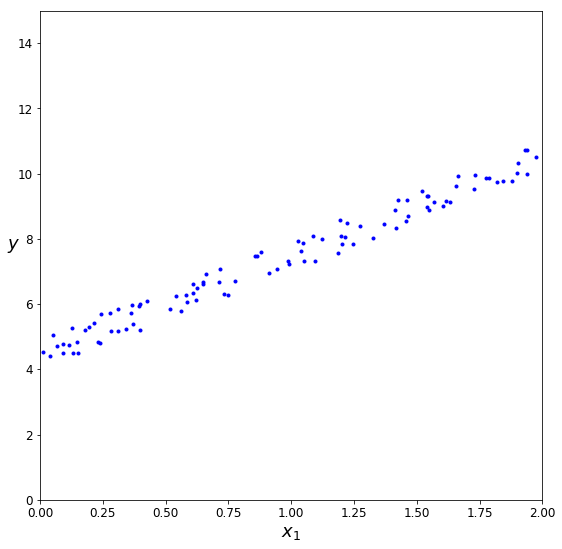

In [53]:
plt.figure(figsize=(9,9))
plt.plot(X,y,"b.")
plt.xlabel("$x_1$",fontsize=18)
plt.ylabel("$y$",rotation=0,fontsize=18)
plt.axis([0,2,0,15])
plt.show()

In [54]:
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [55]:
theta_best

array([[4.51359766],
       [2.98323418]])

In [56]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.51359766],
       [10.48006601]])

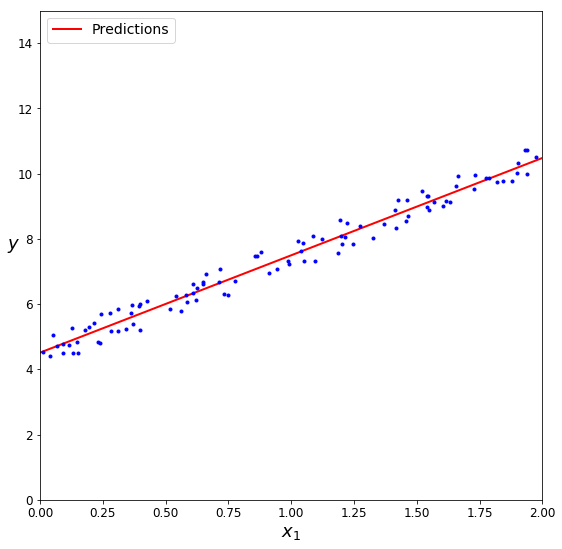

In [57]:
plt.figure(figsize=(9,9))
plt.plot(X_new,y_predict,"r-",linewidth=2,label="Predictions")
plt.plot(X,y,"b.")
plt.xlabel("$x_1$",fontsize=18)
plt.ylabel("$y$",rotation=0,fontsize=18)
plt.legend(loc="upper left",fontsize=14)
plt.axis([0,2,0,15])
plt.show()

In [62]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_,lin_reg.coef_


(array([4.51359766]), array([[2.98323418]]))

In [63]:
lin_reg.predict(X_new)

array([[ 4.51359766],
       [10.48006601]])

In [69]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    


In [70]:
theta

array([[4.51359766],
       [2.98323418]])

In [71]:
theta_path_bgd = []

def plot_gradient_descent(theta,eta,theta_path=None):
    m = len(X_b)
    plt.plot(X,y,"b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new,y_predict,style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$",fontsize=18)
    plt.axis([0,2,0,15])
    plt.title(r"$\eta = {}$".format(eta),fontsize=16)

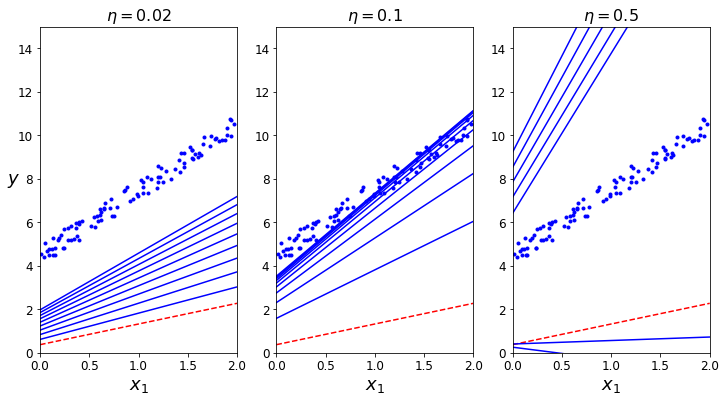

In [84]:
np.random.seed(42)
theta = np.random.rand(2,1)

plt.figure(figsize=(12,6))
plt.subplot(131); plot_gradient_descent(theta,eta=0.02)
plt.ylabel("$y$",rotation=0,fontsize=18)
plt.subplot(132);plot_gradient_descent(theta,eta=0.1,theta_path=theta_path_bgd)
plt.subplot(133);plot_gradient_descent(theta,eta=0.5)

plt.show()

In [85]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

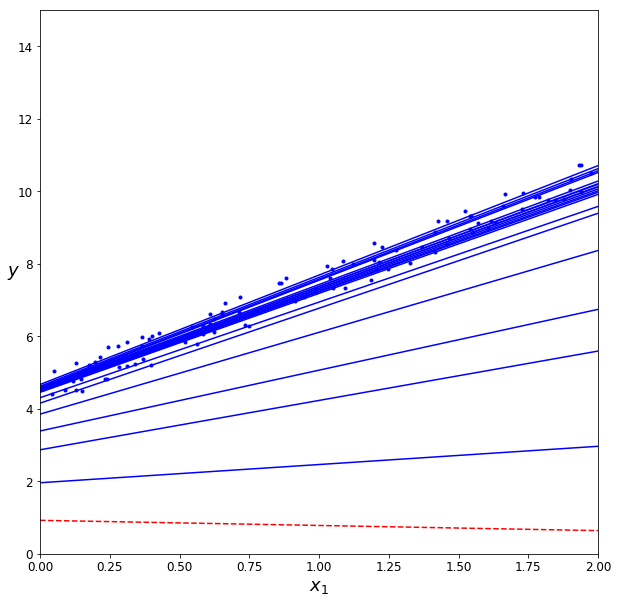

In [100]:
n_epochs = 50 
t0, t1 = 5,50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)
plt.figure(figsize=(10,10))
for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:
            y_predict = X_new_b.dot(theta)
            style = "b-" if i > 0 else "r--"
            plt.plot(X_new,y_predict,style)
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) -yi)
        eta = learning_schedule(epoch * m +1)
        theta = theta - eta *gradients
        theta_path_sgd.append(theta)
    
      

plt.plot(X,y,"b.")
plt.xlabel("$x_1$",fontsize=18)
plt.ylabel("$y$",rotation=0,fontsize=18)
plt.axis([0,2,0,15])
plt.show()

In [101]:
theta

array([[4.51218904],
       [2.97648651]])

In [103]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50,penalty=None,eta0=0.1,random_state=42)
sgd_reg.fit(X,y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.1, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=50,
       n_iter=None, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [104]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.51388816]), array([2.98206789]))

In [105]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)

t0,t1 = 200,1000
def learning_schedule(t):
    return t0 / (t + t1)

t =0 
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0,m,minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [106]:
theta

array([[4.52651397],
       [2.99723869]])

In [107]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

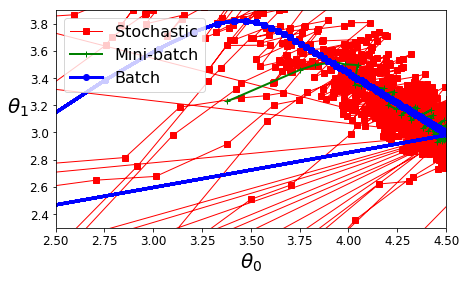

In [116]:

plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

